<a href="https://colab.research.google.com/github/piutrus/kurs-ai/blob/main/bezier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

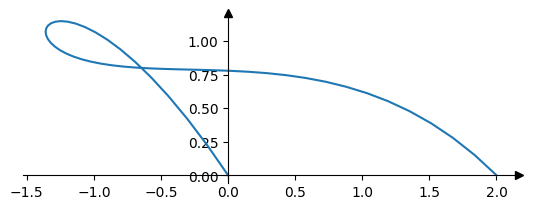

In [35]:
from re import L
import matplotlib.pyplot as plt
import numpy as np
from math import comb

def add_tuples(*tuples):
  if len(set(len(t) for t in tuples)) != 1:
    raise Exception("Tuples must be of equal size")

  _size = len(tuples[0])
  sum = [0] * _size
  for _tuple in tuples:
    for i in range(0, _size):
      sum[i] += _tuple[i]

  return tuple(sum)

def mult_tuple(a, k):
  prod = [1] * len(a)
  for i in range(0, len(a)):
    prod[i] = k*a[i]

  return tuple(prod)

fig, ax = plt.subplots()
ax.spines[["bottom", "left"]].set_position("zero")
ax.spines[["top", "right"]].set_visible(False)
ax.plot(1, 0, ls="", marker=">", color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, ls="", marker="^", color="k", transform=ax.get_xaxis_transform(), clip_on=False)

t = np.linspace(0, 1, 50)
points = [
    (0, 0),
    (-2, 3),
    (-2, -1),
    (0, 2),
    (2, 0)
    ]
addends = [(0, 0)] * len(points)
(X, Y) = (0, 0)

degree = len(points) - 1

for i in range(0, degree + 1):
  addends[i] = mult_tuple(points[i], comb(degree, i)*t**i*(1-t)**(degree-i))
  (X, Y) = add_tuples((X, Y), addends[i])
  #ax.plot(points[i][0], points[i][1], color="k", ls="", marker=".")

#(X, Y) = add_tuples(mult_tuple(points[0], (1-t)**3), mult_tuple(points[1], 3*(1-t)**2*t), mult_tuple(points[2], 3*(1-t)*t**2), mult_tuple(points[3], t**3))

ax.plot(X, Y)
ax.set_aspect(1)

plt.show()